In [28]:
#Preparamos nuestro notebook para el trabajo.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#importo mi funcion para buscar nulos
def missing_values_table(df):
    '''
    Se pasa como parametro un df de pandas, devuelve la 
    cantidad de valores NaN y a que porcentaje del total de valores corresponen
    '''
    
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [7]:
df = pd.read_csv("homicidios_normalizado.csv")

## Descripcion de nuestro conjunto de datos.

-------


El Observatorio de Movilidad y Seguridad Vial (OMSV), centro de estudios que se encuentra bajo la órbita de la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales. Para ello, nos disponibilizan un dataset sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021. Este dataset se encuentra en formato xlsx y contiene dos hojas llamadas: hechos y víctimas. 





In [12]:
#viendo el tamaño del dataset
df.shape

(710, 17)

In [88]:
df.columns

Index(['ID', 'FECHA', 'HORA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle',
       'Ubicacion del accidente', 'Dirección Normalizada', 'COMUNA', 'pos x',
       'pos y', 'PARTICIPANTES', 'ACUSADO', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'AÑO', 'MES'],
      dtype='object')

### Descripcion de las columnas 
------

##### ID: 
- Hace referencia al numero de siniestro fatal.

##### FECHA:
- Fecha exacta en la que sucede el siniestro.

##### HORA:
- Hora aproximada en la que sucede el siniestro.

##### LUGAR_DEL_HECHO:
- Direccion donde sucede el hecho

##### TIPO DE CALLE:
- Tipo de calle donde sucede el hecho. Dentro de esta tenemos las siguientes categorias : CALLE, AVENIDA, GRAL PAZ y AUTOPISTA. Dentro de esta columna surge un problema por su categorizacion. Cuando se hace referencia a autopistas, hay muchas que estan fuera de la competencia territorial de nuestra secretaria debido a que la gran mayoria de las autopistas (ya que son rutas nacionales) estan catalogadas como "caminos nacionales" como sucede por ejemplo con la la Autopista Buenos Aires - La Plata. Esto explicaria el por que de la distincion entre GRAL PAZ y AUTOPISTA, ya que en la realidad ambas tienen caracteristicas altamente similares. Por ahora vamos a utilizar estos datos de todas maneras para sacar realizar nuestro analisis ya que tenerlos nos sirven para implementar posibles medidas en otros casos.

##### CALLE:
- Nombre de la calle donde sucede el accidente.

##### Ubicacion del accidente:
- Columa creada por nosotros. Categoriza los accidentes entre INTERSECCION, MITAD DE CUADRA y AUTOPISTA.

##### Dirección Normalizada:
- Direccion de donde sucede el hecho. Eliminar esta columna

##### COMUNA:
- Comuna donde sucede el hecho, similar a barrio.

##### pos x, pos y:
- Coordenadas

##### PARTICIPANTES:
-  Quienes fueron afectados dentro del accidente, union de acusado y victima, Eliminar esta columna.

##### ACUSADO:
- Categorizacion del acusado. PASAJEROS hace referencia a transporte publico que no sea tren. CARGA, a camiones de carga.

##### ROL:
- Rol que ocupaba la victima 

##### VICTIMA:
- Categorizacion de la victima


------

In [13]:
#viendo tipos de datos
df.dtypes

ID                           int64
FECHA                       object
HORA                        object
LUGAR_DEL_HECHO             object
TIPO_DE_CALLE               object
Calle                       object
Ubicacion del accidente     object
Dirección Normalizada       object
COMUNA                       int64
pos x                      float64
pos y                      float64
PARTICIPANTES               object
ACUSADO                     object
ROL                         object
VICTIMA                     object
SEXO                        object
EDAD                        object
dtype: object

In [20]:
#cambiamos los tipos de datos de cada columna
#De esta forma arreglamos los datos por tipo de variable 
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['LUGAR_DEL_HECHO'] = df['LUGAR_DEL_HECHO'].astype('category') 
df['TIPO_DE_CALLE'] = df['TIPO_DE_CALLE'].astype('category') 
df['Ubicacion del accidente'] = df['Ubicacion del accidente'].astype('category') 
df['COMUNA'] = df['COMUNA'].astype('category')
df['PARTICIPANTES'] = df['PARTICIPANTES'].astype('category')
df['ACUSADO'] = df['ACUSADO'].astype('category')
df['ROL'] = df['ROL'].astype('category')
df['VICTIMA'] = df['VICTIMA'].astype('category')
df['SEXO'] = df['SEXO'].astype('category')
df['EDAD'] = df['EDAD'].astype('category')

In [21]:
#inspeccion visual preliminar
df.head()

,ID,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Ubicacion del accidente,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD
0,20160001,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,INTERSECCION,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19
1,20160002,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",INTERSECCION,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70
2,20160003,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,MITAD DE CUADRA,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30
3,20160004,2016-01-10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,INTERSECCION,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18
4,20160005,2016-01-21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,INTERSECCION,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29


In [22]:
df.tail()

,ID,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Ubicacion del accidente,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD
705,20210093,2021-12-13,17:10:00,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,INTERSECCION,RIESTRA AV. y MOM,7,-58.433538,-34.645616,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
706,20210094,2021-12-20,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",INTERSECCION,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,-58.467398,-34.651178,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
707,20210095,2021-12-30,00:43:00,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,INTERSECCION,GAONA AV. y TERRADA,11,-58.472934,-34.619847,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,27
708,20210096,2021-12-15,10:30:00,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",MITAD DE CUADRA,"PERON, EVA AV. 4071",9,-58.470668,-34.650217,AUTO-CARGAS,CARGAS,CONDUCTOR,AUTO,MASCULINO,60
709,20210097,2021-11-18,06:10:00,PADRE CARLOS MUJICA 709,CALLE,PADRE CARLOS MUJICA,MITAD DE CUADRA,PADRE CARLOS MUGICA 709,1,-58.379762,-34.586796,BICICLETA-AUTO,AUTO,CICLISTA,BICICLETA,MASCULINO,53


In [25]:
#no hay duplicados
df[df.duplicated()]

,ID,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Ubicacion del accidente,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD


In [29]:
#tampoco hay nulos
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Buscando tendencias en nuestros datos

En este apartado, realizaré gráficos de algunas variables con el objetivo de obtener una comprensión más clara de hacia dónde quiero dirigir mi análisis.

Uno de los primeros aspectos que intentaré identificar es la tendencia en la ubicación de accidentes, utilizando las dos columnas que proporcionan una categorización precisa. Dado que resido en la Capital Federal, tengo cierta intuición sobre dónde podrían concentrarse los accidentes de manera más significativa.

Mi impresión es que los accidentes tienden a ocurrir principalmente en las avenidas y en los cruces de calles. A continuación, exploraré esta hipótesis mediante visualizaciones de datos.

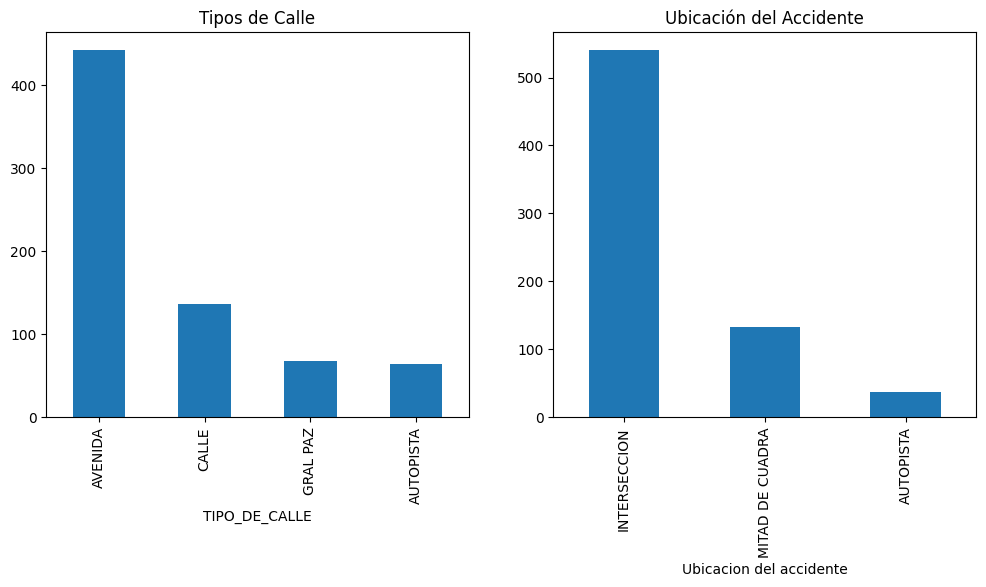

In [40]:
#Esta linea crea una figura para los dos graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el primer conjunto de datos en el primer eje
df["TIPO_DE_CALLE"].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title("Tipos de Calle")

# Graficar el segundo conjunto de datos en el segundo eje
df["Ubicacion del accidente"].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title("Ubicación del Accidente")

#mostrar
plt.show()


Utilizando este sencillo gráfico, puedo confirmar con una sola mirada que mi intuición era acertada. De un total de 710 accidentes fatales en mi conjunto de datos, más de 400 de ellos ocurren específicamente en avenidas, y más de 500 se producen en intersecciones. Aunque esperaba una cantidad considerable, no anticipaba una diferencia tan marcada entre ambas categorías.

Ahora, mi siguiente paso será filtrar los accidentes fatales que tienen lugar en las intersecciones de avenidas.


In [65]:
#utilizo la funcion query para escribir una consulta con sintaxi similar a la de SQL 
df_filtrado = df.query('TIPO_DE_CALLE == "AVENIDA" and `Ubicacion del accidente` == "INTERSECCION"')


Vemos que tenemos mas de la mitad de nuestros registros que ocurren con esta combinacion de parametros.

In [70]:
df_filtrado.value_counts()

ID        FECHA       HORA      LUGAR_DEL_HECHO                                       TIPO_DE_CALLE  Calle                       Ubicacion del accidente  Dirección Normalizada                                   COMUNA  pos x       pos y       PARTICIPANTES     ACUSADO    ROL                   VICTIMA  SEXO       EDAD
20160001  2016-01-01  04:00:00  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ             AVENIDA        PIEDRA BUENA AV.            INTERSECCION             PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.  8       -58.475340  -34.687570  MOTO-AUTO         AUTO       CONDUCTOR             MOTO     MASCULINO  19      1
20190045  2019-06-03  07:27:00  DEL LIBERTADOR AV. Y REPUBLICA DE LA INDIA            AVENIDA        DEL LIBERTADOR AV.          INTERSECCION             DEL LIBERTADOR AV. y REPUBLICA DE LA INDIA              14      -58.413161  -34.575797  MOTO-CARGAS       CARGAS     CONDUCTOR             MOTO     MASCULINO  33      1
20190041  2019-05-11  20:30:00  ALBE

Ahora, mi siguiente paso será explorar la categorización de las víctimas y los acusados en estos accidentes. Para ello, crearé un gráfico de barras que mostrará cómo se distribuyen en diferentes categorías.


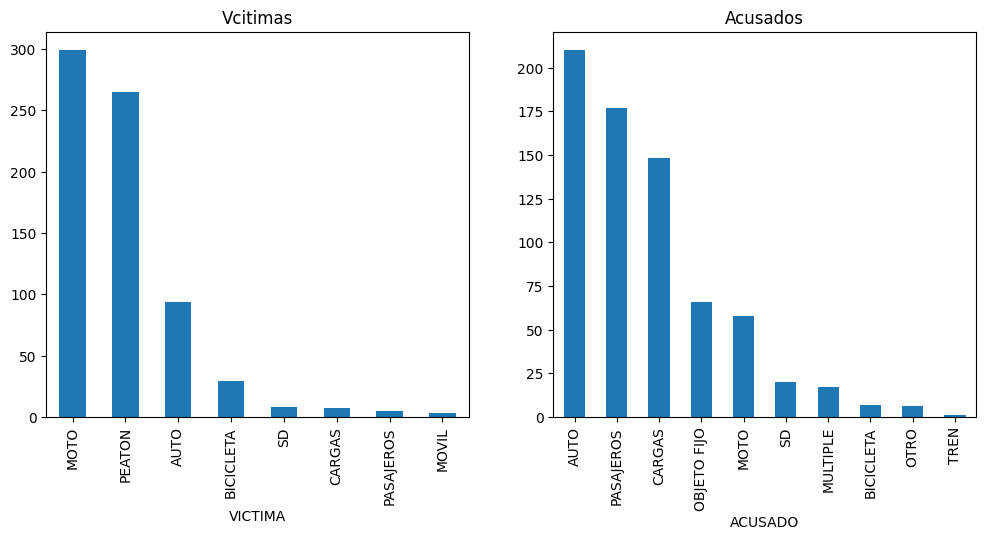

In [42]:
#Esta linea crea una figura para los dos graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el primer conjunto de datos en el primer eje
df["VICTIMA"].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title("Vcitimas")

# Graficar el segundo conjunto de datos en el segundo eje
df["ACUSADO"].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title("Acusados")

#mostrar
plt.show()

También es interesante observar que aproximadamente 550 de los accidentes fatales involucran a víctimas que son MOTOS O PEATONES. Además, entre las tres categorías principales de "ACUSADOS", encontramos un número extremadamente alto, con la presencia de Autos particulares, transportes de pasajeros (buses de línea interna o larga distancia) y transporte de carga (por ejemplo, camiones de carga de basura o combustible).

Mi próximo objetivo será unir estas dos informaciones y determinar cuántos accidentes ocurrieron en una intersección de avenida donde la víctima fatal era una moto o un peatón.

In [72]:
df_filtrado2 = df_filtrado.query('VICTIMA == "MOTO" or VICTIMA == "PEATON"')


In [82]:
df_filtrado2.value_counts()

ID        FECHA       HORA      LUGAR_DEL_HECHO                                     TIPO_DE_CALLE  Calle                                Ubicacion del accidente  Dirección Normalizada                                   COMUNA  pos x       pos y       PARTICIPANTES     ACUSADO      ROL        VICTIMA  SEXO       EDAD
20160001  2016-01-01  04:00:00  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ           AVENIDA        PIEDRA BUENA AV.                     INTERSECCION             PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.  8       -58.475340  -34.687570  MOTO-AUTO         AUTO         CONDUCTOR  MOTO     MASCULINO  19      1
20190037  2019-05-01  23:10:00  LA RIOJA E INDEPENDENCIA AV.                        AVENIDA        LA RIOJA                             INTERSECCION             LA RIOJA e INDEPENDENCIA AV.                            3       -58.407783  -34.619719  MOTO-AUTO         AUTO         CONDUCTOR  MOTO     MASCULINO  17      1
20190029  2019-04-07  10:15:00  FERNANDEZ 

**El numero se redujo a 299 registros**


De un total de 710 fallecimientos, 299 fueron accidentes que sucedieron en una interseccion de una avenida y que el fallecido fué un conductor (o pasajero) de moto o un peaton.
 

------

## Accidentes por años

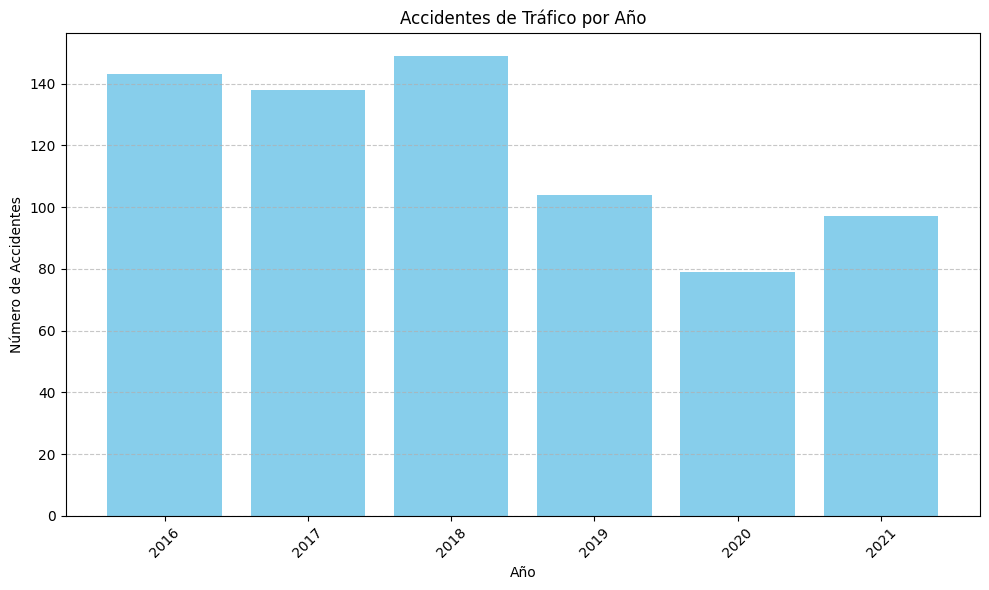

In [83]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['AÑO'] = df['FECHA'].dt.year
accidentes_por_año = df['AÑO'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidentes_por_año.index, accidentes_por_año.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes de Tráfico por Año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




## Accidentes por Mes

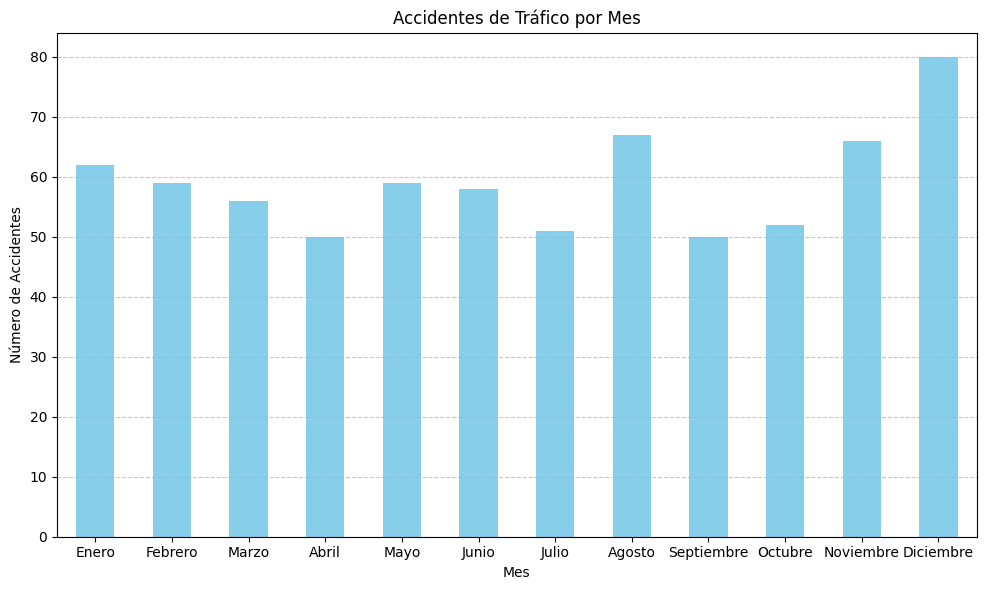

In [85]:
df['MES'] = df['FECHA'].dt.month

accidentes_por_mes = df['MES'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
accidentes_por_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes de Tráfico por Mes')
plt.xticks(rotation=0)  # Para que los nombres de los meses no se roten
plt.grid(axis='y', linestyle='--', alpha=0.7)


meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(range(0, 12), meses)

plt.tight_layout()
plt.show()

Pareciera que la fecha, ya sea agrupando por año o por mes, no es una variable determinante para analizar la cantidad de accidentes fatales en CABA. Sin embargo, encontramos que en el año 2020 hubo casi la mitad de accidentes fatales que en el año 2016, posiblemente debido a las medidas de distanciamiento social por el Covid-19.

------


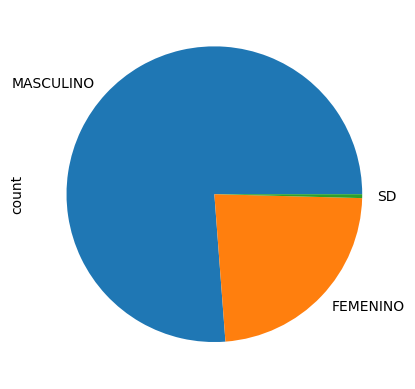

In [92]:
df["SEXO"].value_counts().plot(kind='pie')
plt.show()


Aunque resulta sumamente interesante encontrar que casi el 75% de los accidentes fatales tiene como victima una persona de genero masculino, con la informacion que tengo me resulta imposible encontrar un significado.

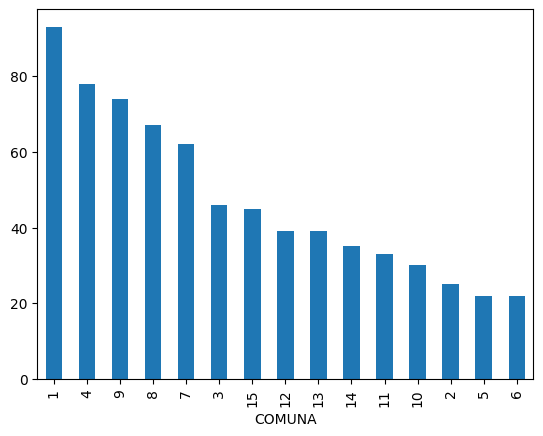

In [94]:
df["COMUNA"].value_counts().plot(kind='bar')
plt.show()

Podemos ver que tenemos ciertas comunas que son menos propensas a las fatalidades en los accidentes de transito, y otras que son mucho mas. Podemos identificar algunas tendencias por ejemplo, la comuna 1 y 4 corresponde a la zona mas centrica de CABA, zona que se caracteriza por ser el sector de oficinas de la ciudad. Lo mas probable sea que el transito en estas zonas sean mucho mas concurrido que en otras, por ejemplo la comuna 6, la cual corresponde al barrio "caballito", un barrio casi en su totalidad, residencial.